In [1]:
import pickle
import pandas as pd

In [3]:
with open('所有会员消费.pkl', 'rb') as f:
    df5 = pickle.load(f)

In [20]:
df50 = df5[['kh', 'dtime', 'spmc','sl','sj', 'je', 'jf','gzbm','lbbm']]

In [21]:
df50['dtime'] = df50['dtime'].astype('datetime64[D]')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df50

,kh,dtime,spmc,sl,sj,je,jf,gzbm,lbbm
0,5bfd4a2e,2016-05-08,素然B价件,1,1250.0,1125.00,0.0,3268,70101
1,0a69471f,2016-05-08,素然B价件,1,1850.0,1665.00,0.0,3268,70101
2,0a69471f,2016-05-08,素然B价件,1,695.0,625.50,0.0,3268,70101
3,49e89b58,2016-05-08,素然B价件,1,1300.0,1170.00,0.0,3268,70101
4,49e89b58,2016-05-08,素然B价件,1,1400.0,1260.00,0.0,3268,70101
...,...,...,...,...,...,...,...,...,...
906641,7ff6682d,2018-01-01,雅诗兰黛白金级奢宠紧颜乳霜瓶,1,9000.0,7943.71,291.0,8085,40101
906642,7ff6682d,2018-01-01,雅诗兰黛白金级奢宠紧颜乳霜瓶,1,9000.0,8044.37,448.0,8085,40101
906643,2a3ddfa7,2018-01-01,雪花秀明星肌本护肤礼盒瓶,1,1440.0,1337.75,1338.0,8214,40101
906644,d3b7b274,2018-01-02,雪花秀致美润白气垫粉底液23号盒,1,450.0,450.00,450.0,8214,40101


将“连带率”解释为“共现率”，即和其他商品同时购买的比率。
以下计算连带率：

In [27]:
df51 = df50[['kh','dtime','spmc']]

In [41]:
df52 = df51.groupby(['kh','dtime'],sort=False).count()

In [77]:
co_occurrence = {}  # 商品名称：共现率
for (kh,dtime), line in df52.iterrows():
    df53 = df51[(df51['kh']==kh) & (df51['dtime']==dtime)]
    spmc_list = list(df53['spmc'].drop_duplicates())
    for spmc in spmc_list:
        try:
            co_occurrence[spmc] += 1/df53.shape[0]
        except:
            co_occurrence[spmc] = 0
            co_occurrence[spmc] += 1/df53.shape[0]
    if(len(co_occurrence) > 300):  # 作为示例，仅计算300种商品连带率
        break

In [88]:
cooc_df = pd.DataFrame(co_occurrence, index=co_occurrence.keys()).T.drop(columns=list(co_occurrence.keys())[1:])
cooc_df.columns = ['cooc']
cooc_df = cooc_df.sort_values('cooc', ascending=False)
cooc_df['spmc'] = cooc_df.index
cooc_df

,cooc,spmc
素然正价件,243.940842,素然正价件
素然B价件,23.767215,素然B价件
毛巾正价条,3.500000,毛巾正价条
DKNY A件,1.450000,DKNY A件
Thursday IslondC无,1.342857,Thursday IslondC无
...,...,...
赫莲娜活颜舒缓调理乳.,0.032258,赫莲娜活颜舒缓调理乳.
海蓝之谜修护精华露.,0.032258,海蓝之谜修护精华露.
soho用品正价件,0.032258,soho用品正价件
海蓝之谜修护精萃液.,0.032258,海蓝之谜修护精萃液.


Text(0.5, 1.0, 'cooccorrence')

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

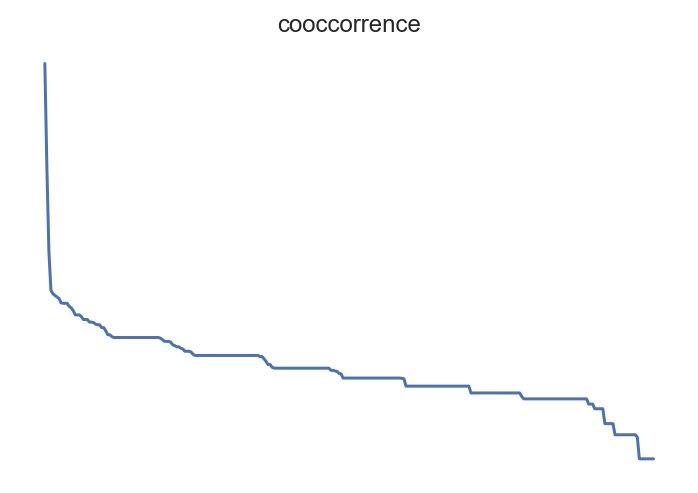

In [116]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from matplotlib.font_manager import fontManager
matplotlib.rc("font",family='SimHei') # 中文字体
sns.set_theme()
plt.axis('off')
sns.lineplot(data=cooc_df, x='spmc', y=np.log(cooc_df['cooc']))
plt.title('cooccorrence')

FangSong,浠垮畫
NSimSun,鏂板畫浣�
STHupo,鍗庢枃鐞ョ弨
STCaiyun,鍗庢枃褰╀簯
STKaiti,鍗庢枃妤蜂綋
Microsoft JhengHei UI,Microsoft JhengHei UI Light
Microsoft JhengHei UI
STXihei,鍗庢枃缁嗛粦
FandolFang,FandolFang R
STXinwei,鍗庢枃鏂伴瓘
DengXian,绛夌嚎,DengXian Light,绛夌嚎 Light
STXingkai,鍗庢枃琛屾シ
FandolSong
STSong,鍗庢枃瀹嬩綋
KaiTi,妤蜂綋
STLiti,鍗庢枃闅朵功
Microsoft YaHei UI,Microsoft YaHei UI Light
Microsoft JhengHei,寰�杌熸�ｉ粦楂�,Microsoft JhengHei Light,寰�杌熸�ｉ粦楂� Light
Microsoft YaHei UI
Microsoft JhengHei,寰�杌熸�ｉ粦楂�
FZShuTi,鏂规�ｈ垝浣�
STFangsong,鍗庢枃浠垮畫
Microsoft YaHei,寰�杞�闆呴粦,Microsoft YaHei Light,寰�杞�闆呴粦 Light
AR PL SungtiL GB,鏂囬紟锛帮棘绠�鎶ュ畫
AR PL KaitiM Big5,鏂囬紟锛帮棘涓�妤�
SimSun,瀹嬩綋
AR PL KaitiM GB,鏂囬紟锛帮棘绠�涓�妤�
AR PL Mingti2L Big5,鏂囬紟锛帮棘绱颁笂娴峰畫
STZhongsong,鍗庢枃涓�瀹�
FZYaoTi,鏂规�ｅ�氫綋
FandolHei
Microsoft YaHei,寰�杞�闆呴粦
YouYuan,骞煎渾
DengXian,绛夌嚎
FandolKai
SimHei,榛戜綋
LiSu,闅朵功
